## Assignment 1 (due date: March 7th, 2025)
### Student ID: 21251215
### Student Name: Yu Fengfei
### Data Source: https://www.kaggle.com/datasets/ibkya12/vehicle-price-prediction-dataset

In [197]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt

In [198]:
df = pd.read_csv("Processed_Cardetails.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,model
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1,1
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2,2
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,3,3
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,0,4


 ### Q1. Fill all the `null` values with `"unknown"`.

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
 13  brand          8128 non-null   int64  
 14  model          8128 non-null   int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 952.6+ KB


In [200]:
df = df.fillna("unknown")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           8128 non-null   object
 1   year           8128 non-null   int64 
 2   selling_price  8128 non-null   int64 
 3   km_driven      8128 non-null   int64 
 4   fuel           8128 non-null   object
 5   seller_type    8128 non-null   object
 6   transmission   8128 non-null   object
 7   owner          8128 non-null   object
 8   mileage        8128 non-null   object
 9   engine         8128 non-null   object
 10  max_power      8128 non-null   object
 11  torque         8128 non-null   object
 12  seats          8128 non-null   object
 13  brand          8128 non-null   int64 
 14  model          8128 non-null   int64 
dtypes: int64(5), object(10)
memory usage: 952.6+ KB


### Q2. Reorder items by `year` in ascending order, then reset the index.

In [201]:
df = df.sort_values(by='year', ascending=True)
df = df.reset_index(drop=True)
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,model
0,Mahindra Willys CJ 3B 4X4,1983,300000,10000,Diesel,Individual,Manual,Third Owner,unknown,unknown,unknown,unknown,unknown,7,257
1,Maruti Omni LPG STD BSIV,1991,55000,120000,LPG,Individual,Manual,Second Owner,unknown,unknown,unknown,unknown,unknown,0,1126
2,Mahindra Jeep CL 500 MDI,1994,120000,100000,Diesel,Individual,Manual,Second Owner,unknown,unknown,unknown,unknown,unknown,7,765
3,Maruti 800 AC,1994,45000,60000,Petrol,Individual,Manual,First Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0,0,515
4,Ambassador Classic 2000 DSZ AC PS,1994,99000,100000,Diesel,Individual,Manual,Second Owner,12.8 kmpl,1995 CC,52 bhp,106Nm@ 2200rpm,5.0,27,1570
5,Mahindra Jeep MM 540,1995,160000,90000,Diesel,Individual,Manual,Third Owner,unknown,unknown,unknown,unknown,unknown,7,911
6,Maruti 800 Std,1995,55000,70000,Petrol,Individual,Manual,First Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0,0,39
7,Mahindra Jeep Classic,1996,163000,5000,Diesel,Individual,Manual,Second Owner,unknown,unknown,unknown,unknown,unknown,7,672
8,Maruti 800 DX,1996,40000,32000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0,0,782
9,Maruti 800 AC,1996,42000,70000,Petrol,Individual,Manual,Third Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0,0,515


### Q3. How many cars are owned by each category of `seller_type`?

In [202]:
group_counts = df["seller_type"].value_counts()
group_counts

seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64

### Q4. How many cars having `selling_price` lower than 100000 with `km_driven` higher than 50000 for each year?

In [203]:
musk = (df["selling_price"] < 100000) & (df["km_driven"] > 50000)
filtered_df = df[musk]
year_group = filtered_df["year"].value_counts()

year_data = pd.DataFrame(year_group)
year_data = year_data.sort_values(by='year', ascending=True)
year_data

,count
year,
1991,1
1994,2
1995,1
1996,1
1997,7
1998,6
1999,12
2000,11
2001,6


### Q5. What is the average `seats` of cars for each `transmission type`?

In [204]:
new_df = df.copy()

new_df['seats'] = new_df['seats'].replace('unknown', np.nan)

avg_seats = new_df[['transmission', 'seats']].groupby('transmission').mean()
avg_seats

,seats
transmission,
Automatic,5.237272
Manual,5.443927


### Q6. Draw a scatter plot to investigate if `km_driven` and `selling_price` are positively correlated each other.

array([[<Axes: xlabel='km_driven', ylabel='km_driven'>,
        <Axes: xlabel='selling_price', ylabel='km_driven'>],
       [<Axes: xlabel='km_driven', ylabel='selling_price'>,
        <Axes: xlabel='selling_price', ylabel='selling_price'>]],
      dtype=object)

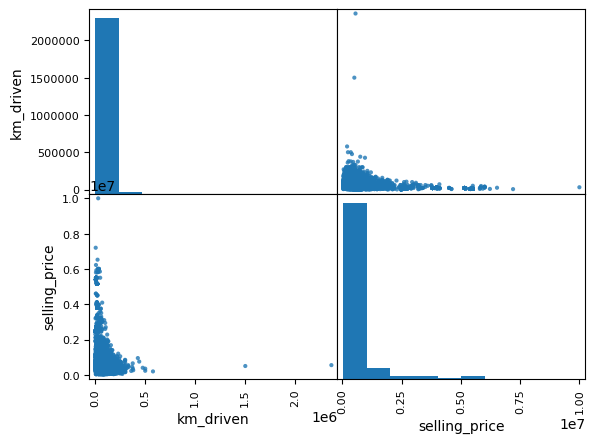

In [205]:
pd.plotting.scatter_matrix(new_df[['km_driven', 'selling_price']], alpha=0.8)

### Q7. Create a pivot table that shows the mean `km_driven` and `selling_price` values for each `fuel`.

In [206]:
compute_pivot_table = df.pivot_table(index=["fuel"], values=["km_driven", "selling_price"], aggfunc='mean')
compute_pivot_table

,km_driven,selling_price
fuel,,
CNG,68288.438596,301017.491228
Diesel,83677.137210,791452.921627
LPG,89174.105263,200421.052632
Petrol,52840.861746,462441.061691


### Q8. Check the unique values in the `owner` column and map 'First Owner' to 1, 'Second Owner' to 2 and 'Third Owner' to 3. The other values in `owener` should be assigned -1.

In [207]:
df["owner"].unique()

array(['Third Owner', 'Second Owner', 'First Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [208]:
df["owner"] = df["owner"].map({"First Owner": 1, "Second Owner": 2, "Third Owner": 3, "Fourth & Above Owner": -1, "Test Drive Car": -1}).astype(int)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,model
0,Mahindra Willys CJ 3B 4X4,1983,300000,10000,Diesel,Individual,Manual,3,unknown,unknown,unknown,unknown,unknown,7,257
1,Maruti Omni LPG STD BSIV,1991,55000,120000,LPG,Individual,Manual,2,unknown,unknown,unknown,unknown,unknown,0,1126
2,Mahindra Jeep CL 500 MDI,1994,120000,100000,Diesel,Individual,Manual,2,unknown,unknown,unknown,unknown,unknown,7,765
3,Maruti 800 AC,1994,45000,60000,Petrol,Individual,Manual,1,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0,0,515
4,Ambassador Classic 2000 DSZ AC PS,1994,99000,100000,Diesel,Individual,Manual,2,12.8 kmpl,1995 CC,52 bhp,106Nm@ 2200rpm,5.0,27,1570


### Q9. Convert the `transmission` using one-hot encoding and merge the new column into the dataframe

In [209]:
one_hot_encoded = pd.get_dummies(df['transmission'], prefix='transmission').astype(int)
df = df.join(one_hot_encoded)
df = df.drop(['transmission'], axis=1)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,owner,mileage,engine,max_power,torque,seats,brand,model,transmission_Automatic,transmission_Manual
0,Mahindra Willys CJ 3B 4X4,1983,300000,10000,Diesel,Individual,3,unknown,unknown,unknown,unknown,unknown,7,257,0,1
1,Maruti Omni LPG STD BSIV,1991,55000,120000,LPG,Individual,2,unknown,unknown,unknown,unknown,unknown,0,1126,0,1
2,Mahindra Jeep CL 500 MDI,1994,120000,100000,Diesel,Individual,2,unknown,unknown,unknown,unknown,unknown,7,765,0,1
3,Maruti 800 AC,1994,45000,60000,Petrol,Individual,1,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0,0,515,0,1
4,Ambassador Classic 2000 DSZ AC PS,1994,99000,100000,Diesel,Individual,2,12.8 kmpl,1995 CC,52 bhp,106Nm@ 2200rpm,5.0,27,1570,0,1


### Q10. Apply min-max normalization to `seats`.

In [210]:
min_max_scaler  = preprocessing.MinMaxScaler()

min_max_df = df.copy()

min_max_df['seats'] = df['seats'].replace('unknown', np.nan)

min_max_df['seats'] = min_max_df['seats'].fillna(min_max_df['seats'].mean())

min_max_df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,owner,mileage,engine,max_power,torque,seats,brand,model,transmission_Automatic,transmission_Manual
0,Mahindra Willys CJ 3B 4X4,1983,300000,10000,Diesel,Individual,3,unknown,unknown,unknown,unknown,5.416719,7,257,0,1
1,Maruti Omni LPG STD BSIV,1991,55000,120000,LPG,Individual,2,unknown,unknown,unknown,unknown,5.416719,0,1126,0,1
2,Mahindra Jeep CL 500 MDI,1994,120000,100000,Diesel,Individual,2,unknown,unknown,unknown,unknown,5.416719,7,765,0,1
3,Maruti 800 AC,1994,45000,60000,Petrol,Individual,1,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.000000,0,515,0,1
4,Ambassador Classic 2000 DSZ AC PS,1994,99000,100000,Diesel,Individual,2,12.8 kmpl,1995 CC,52 bhp,106Nm@ 2200rpm,5.000000,27,1570,0,1
5,Mahindra Jeep MM 540,1995,160000,90000,Diesel,Individual,3,unknown,unknown,unknown,unknown,5.416719,7,911,0,1
6,Maruti 800 Std,1995,55000,70000,Petrol,Individual,1,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.000000,0,39,0,1
7,Mahindra Jeep Classic,1996,163000,5000,Diesel,Individual,2,unknown,unknown,unknown,unknown,5.416719,7,672,0,1
8,Maruti 800 DX,1996,40000,32000,Petrol,Individual,2,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.000000,0,782,0,1
9,Maruti 800 AC,1996,42000,70000,Petrol,Individual,3,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.000000,0,515,0,1


In [211]:
df_scale_min_max = min_max_scaler.fit_transform(min_max_df.loc[:, min_max_df.columns == 'seats'])
df_scale_min_max = pd.DataFrame(df_scale_min_max,columns = min_max_df.columns[min_max_df.columns == 'seats'])

min_max_df["seats"] = df_scale_min_max

min_max_df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,owner,mileage,engine,max_power,torque,seats,brand,model,transmission_Automatic,transmission_Manual
0,Mahindra Willys CJ 3B 4X4,1983,300000,10000,Diesel,Individual,3,unknown,unknown,unknown,unknown,0.284727,7,257,0,1
1,Maruti Omni LPG STD BSIV,1991,55000,120000,LPG,Individual,2,unknown,unknown,unknown,unknown,0.284727,0,1126,0,1
2,Mahindra Jeep CL 500 MDI,1994,120000,100000,Diesel,Individual,2,unknown,unknown,unknown,unknown,0.284727,7,765,0,1
3,Maruti 800 AC,1994,45000,60000,Petrol,Individual,1,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,0.166667,0,515,0,1
4,Ambassador Classic 2000 DSZ AC PS,1994,99000,100000,Diesel,Individual,2,12.8 kmpl,1995 CC,52 bhp,106Nm@ 2200rpm,0.250000,27,1570,0,1
5,Mahindra Jeep MM 540,1995,160000,90000,Diesel,Individual,3,unknown,unknown,unknown,unknown,0.284727,7,911,0,1
6,Maruti 800 Std,1995,55000,70000,Petrol,Individual,1,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,0.166667,0,39,0,1
7,Mahindra Jeep Classic,1996,163000,5000,Diesel,Individual,2,unknown,unknown,unknown,unknown,0.284727,7,672,0,1
8,Maruti 800 DX,1996,40000,32000,Petrol,Individual,2,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,0.166667,0,782,0,1
9,Maruti 800 AC,1996,42000,70000,Petrol,Individual,3,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,0.166667,0,515,0,1


### Q11. Draw line charts of annually averaged values of `selling_price` separated by `fuel`.

In [221]:
annual_sales = df.groupby(["fuel", "year"])["selling_price"].mean()
annual_sales = annual_sales.unstack(level=0)
print(annual_sales)

fuel            CNG        Diesel            LPG        Petrol
year                                                          
1983            NaN  3.000000e+05            NaN           NaN
1991            NaN           NaN   55000.000000           NaN
1994            NaN  1.095000e+05            NaN  4.500000e+04
1995            NaN  1.600000e+05            NaN  5.500000e+04
1996            NaN  1.630000e+05            NaN  4.100000e+04
1997            NaN  1.085000e+05            NaN  8.611100e+04
1998            NaN  2.100000e+05            NaN  5.788889e+04
1999            NaN  1.332500e+05   70000.000000  5.861538e+04
2000   80000.000000  1.385714e+05            NaN  7.120814e+04
2001            NaN           NaN            NaN  4.849830e+04
2002            NaN  1.639998e+05            NaN  8.769565e+04
2003  130000.000000  1.360000e+05            NaN  7.966280e+04
2004            NaN  1.454167e+05            NaN  1.026971e+05
2005            NaN  2.182500e+05            NaN  1.098

<Axes: title={'center': 'Annual Averaged Sales by fuel'}, xlabel='year'>

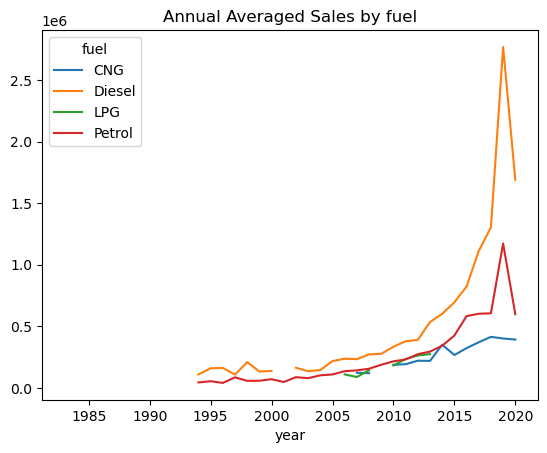

In [223]:
annual_sales.plot(kind='line', title='Annual Averaged Sales by fuel')